<img src="data/drill_ship.png" style="width:300px; float:left">
<h1 style="text-align: center; color:teal">Data Science and Machine Learning for Planet Earth - Assessment</h1>

<h3 style="text-align: center; color:darkgray">Taken by MSc students on the ACSE, EDSML and GEMS courses</h3>

<h2 style="text-align: center; color:darkred">09:00 – 17:00 BST, Friday 17th of November 2023</h2>

<h2 style="text-align: center; color:red">REMINDER: THIS IS AN INDIVIDUAL ASSESSMENT</h2>

# 🐟 Read the `README.md` file for important information:

We strongly recommend that you read the `README.md` file, and even keep it open on GitHub for referencing during the assessement. It contains more detail on:

- <h3 style="color:teal">Description of the features of your data, and what they mean</h3>
- <h3 style="color:brown">A recommended workflow for this assessment</h3>
- <h3 style="color:teal">A reminder about what constitutes plagiarism</h3>
- <h3 style="color:brown">Details about the assessment criteria</h3>
- <h3 style="color:teal">Submitting your assessment</h3>
- <h3 style="color:brown">Referrencing your sources</h3>

To keep this notebook tidy and small, all of the above are available in the `README.md` file in this repo. 

# 🌊 Predicting Lithologies for the Ocean Drilling Program

In this assessment, you are the **boss of your own AI consluting company**: ***<span style="color:teal">MSC-AI Consulting</span>***. Your client is the **Integrated Ocean Drilling Program** (IODP), a reputable research institution with the mission of drilling the seafloor in order to understand the dynamic of the Earth and its past climates. You know that IODP has approached other, competing AI consulting companies: so don't let them see your answer, and try to do better than them to convince the client to give you the best score!

IODP routinely uses two different types of data:

1. **Cores**: A core is a piece of rock recovered from the seafloor. This allows geologist to perform analysis on the material, and to identify exactly what type of rock is present. Cores are however difficult to recover, and expensive. You can <a href="https://www.ga.gov.au/scientific-topics/marine/survey-techniques/sedimentary-coring-drilling">learn more about cores here if you want</a>.
2. **Downhole (wireline) logs**: IODP can also use downhole or wireline logs, i.e. data from  instruments that are lowered in a drill hole by research geologists. Drill holes can be very deep, down to several kilometers below the water-sediment interface (the unit used is `Depth_WMSF`, also known as meters below seafloor - larger numbers means deeper in the well). Downhole logs record properties of the rocks they measure, including natural gamma radiation (total gamma ray `HCGR`, potassium `HFK`, thorium `HTHO`, uranium `HURA`, shallow and deep penetration resistivity (`IDPH` and `IMPH`) and neutron porosity (`SFLU`). The goal is to use these properties measured continuously to estimate the **lithology** (i.e. type of rock) present. More details are provided <a href="https://en.wikipedia.org/wiki/Well_logging">on this website if you are interested</a>.

IODP has been experimenting recently with a brand new type of downhold log called <code>munsel_color</code>. They reckon that this new log type alongside the others could help in the identification of the lithology from wireline log data. They are very excited to test this, and have contacted you to help them - so you see this type of log for the first time.

## ⛴️ Your task

You are given drilling and logging data (`data/lithology.csv`) that can be used for training and testing, and that contains data from a single well (a drilling location) from 0 to 450 MWSF. In the context of the Integrated Ocean Drilling Program (IODP), the acronym **WMSF** stands for **Water-Depth Meters Below Seafloor**. This unit of measurement is commonly used in ocean drilling and marine geology to specify the depth below the seafloor at which samples are taken or observations are made. 

You are also being given a second file file (`data/new_samples.csv`) that contains logging data **in the same well** but from 450 WMSF down to 700 MWSF (so deeper than your training data). There is no core data in this interval, only logging data. This means that the `lithology` is not known, and **your goal is to use this wireline log data to predict lithology**. 

The following diagrams illustrates this situation:

<img src="data/well.jpg" style="width:600px;">

IODP wants you to train the best algorithm to classify lithology based on the log data provided. The also give you some strict guidance about what they want:

1. 🪸 You can prepare your data any way you want, and select any features you want. But as mentioned previously, IODP is very keen on using their new logging tool called `munsell_color` for your predictions. They stipulate that you need to use this feature in your data pipeline - how you use it is up to you.
<br><br>
2. 🪸 To predict `lithology`, you can use **any parametric model** from sklearn that you prefer. This includes for instance `LogisticRegression`, `SVC(kernel="linear")`, and many others. If you don't know whether your algorithm is parametric, you can try to call the `.coef_` method on it after you `fit` it. If you get an error, it is not parametric and using this model would disqualify you (for instance, `SVC()`, `RandomForest`, `KNeighborsClassifier` are not parametric). You are also told that using `ensemble methods` is not allowed. And you are strongly discouraged from using `MLPClassifier` (too long to train, and too many coefficients - see criteria 2 below).
<br><br>
3. 🪸 You need to put your entire workflow within a `pipeline` object. This pipeline can be of arbitrary complexity, but it needs to ***1.*** be able to take raw data and produce a predictions of labels directly, and ***2.*** the last position of your pipeline should be your parametric estimator (so if IODP does something like `pipeline[-1]` in their automatic testing they will obtain your estimator object).
<br><br>
4. 🪸 IODP will assess the performance of your algorithm in two ways. First, they will use the `F1 macro averaging` score on the label of your **unseen data** (i.e. the data in `data/new_samples.csv`), and subtract the `F1 macro averaging` score of your **test set** (which you can choose as you see fit). The smaller the difference between your test set score and the unseen data score, the better. This implies that they will want to have access to your test and train sets (see **Part C - Writing a class** for details).
<br><br>
5. 🪸 IODP also prefers a balance between high F1 macro score, but simpler models with **as few model coefficients (i.e. model weights) as possible** (as a reminder, the number of weights is exactly proportional to the number of features seen by the classifier). This is why, as a second assessment of your model performance, IODP will look at the ratio of your `F1 macro` score on the predicted **unseen data** divided by the **number of coefficients** in your model (i.e. `model.coef_.shape[1]`), this ratio then multiplied by 100 (higher=better). Hence, you should aim for as few weights as possible (i.e. coefficients) in your model whilst maintaining a decent performance. And as a reminder of point 1. above, you need to include the `munsell_color` feature one way or another in your classifier.
<br><br>
6. 🪸 For fairness, IODP wants you to set `random_state=42` for any algorithm that requires a random state. Failure to do so might result in a lower score.

# Run the cell below first

This will help automatically reload your class when you make changes to it in **Part C**.

In [1]:
%load_ext autoreload
%autoreload 2

# 🐳  PART A: Exploratory Data Analysis (EDA) [30 marks]

In this first task, the client wants you to use this notebook to do some <b>Exploratory Data Analysis</b>. <br>
Make sure to keep the notebook clean, and running from top to bottom. Use markdown cells to explain what you are doing, why, and what your finding and conclusions are. Your goal is the understand your data and how you can best model it.

In [2]:
import pandas as pd
import numpy as np
# Load the data:

df = pd.read_csv('data/log_data.csv') # This is your EDA (Part A) and training data (Parts B and C)

new_samples = pd.read_csv('data/new_data.csv') # This is the file you need to predict in parts B and C

In [3]:
# Create as many cell as you need - keep your notebook clean
import pandas as pd
df =pd.DataFrame(df)
df =df.drop_duplicates()
df.duplicated().sum()

0

In [4]:
df.sort_values(by='DEPTH_WMSF')
size =df.shape
s=size[0]*0.7
y_df =df.loc[:,['lithology']]
x_df =df.drop(['lithology'],axis =1)
Xtrain =x_df.loc[:s]
Xtest =x_df.loc[s:]
ytrain =y_df.loc[:s]
ytest =y_df.loc[s:]

I want to split the data by depth as the area that is meant to be predicticed is at a different depth to the training data, so i have split the data due to depth 30% test size and 70% train size as that is the common split. I am cheacking the data for null data and extream outliers.

In [5]:
Xtrain.isnull().sum()
Xtrain.min()
num_cols =Xtrain.select_dtypes(include=np.number).columns
num =Xtrain._get_numeric_data()
num[num<0]=None
num
Xtrain[num_cols]=num
Xtrain.isnull().sum()

/tmp/ipykernel_263549/4245923281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain[num_cols]=num


DEPTH_WMSF       0
HCGR             0
HFK             22
HTHO             9
HURA            96
IDPH             0
IMPH             0
SFLU             0
munsel_color     0
dtype: int64

the negative values turned into null values are clearly less that 30% of the data so it should
be fine to use an imputer to fill in the missing values

<Axes: >

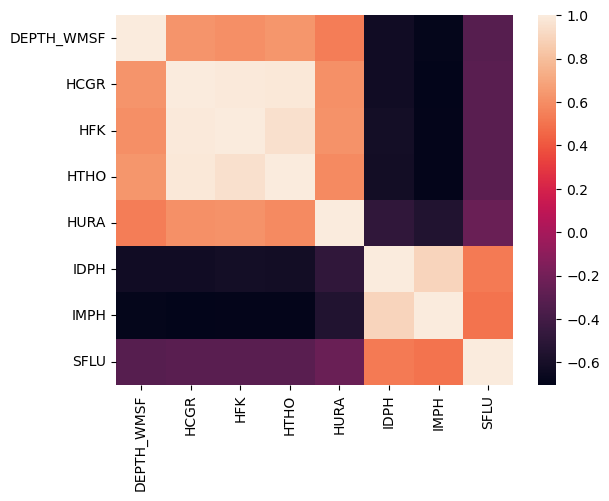

In [6]:
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

corr =Xtrain[num_cols].corr()
sns.heatmap(data=corr)

from the correlation heat map it looks like some of the features are highly correlating to each other

<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

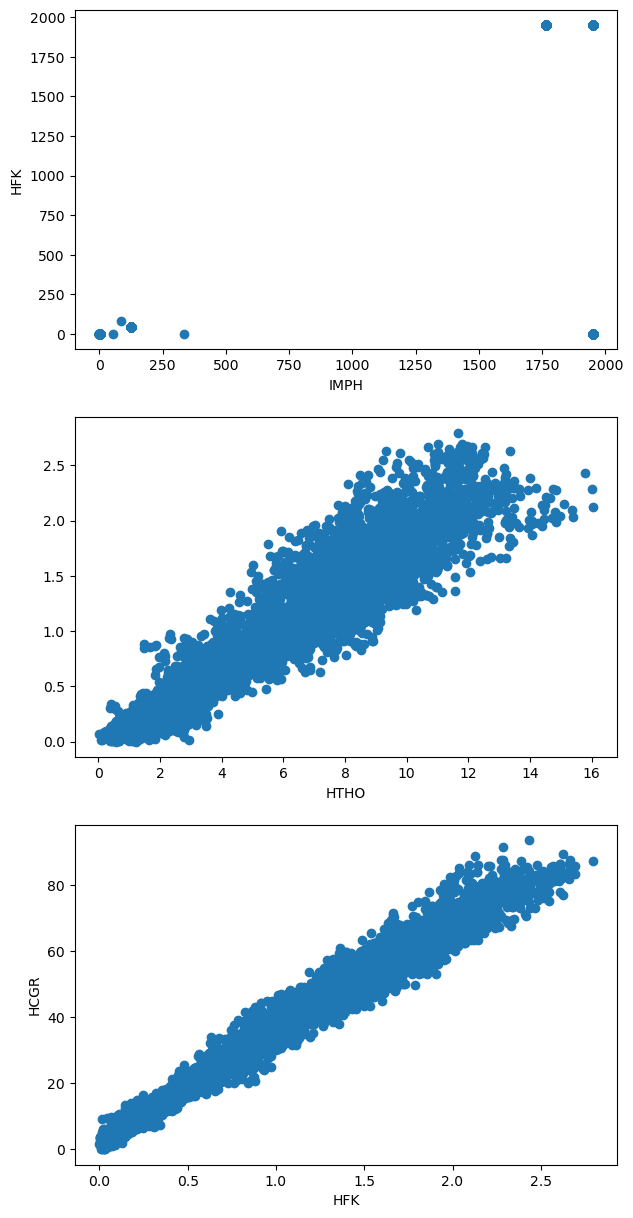

In [7]:
fig, (ax1,ax2,ax3) =plt.subplots(3, figsize=(7,15))
ax1.scatter(Xtrain['IMPH'],Xtrain['IDPH'])
ax1.set_xlabel('IMPH')
ax1.set_ylabel('IDPH')
ax2.scatter(Xtrain['HTHO'],Xtrain['HFK'])
ax2.set_xlabel('HTHO')
ax1.set_ylabel('HFK')
ax3.scatter(Xtrain['HFK'],Xtrain['HCGR'])
ax3.set_xlabel('HFK')
ax3.set_ylabel('HCGR')
plt.imshow

In [8]:
corr_values =Xtrain[num_cols].corr()
#corr_values.sort_values()
#correlation =pd.DataFrame(corr_values)
highcorr =corr_values[(corr_values>0.8)]
highcorr
Xtrain =Xtrain.drop(['HFK','HTHO','IDPH','DEPTH_WMSF'], axis=1)

In [9]:
print(Xtrain['munsel_color'].describe())
print(ytrain.describe())
print(Xtrain['munsel_color'].isnull().sum())

count         7382
unique          40
top       10B 8 12
freq          2618
Name: munsel_color, dtype: object
       lithology
count       7382
unique         5
top          Mud
freq        3192
0


I can tell from this matrix that there are a few features that are highly correlated to each other so i am going to drop some of them

# 🐠 PART B: Finding the best model [30 marks]

Once you understand your data, you can start to find the best model. Remember that IODP has a few criteria for you:
1. You must at least use the `munsell_color` feature in your model
2. You must write the entire model as a `pipeline` that can process raw data and return a prediction. Your estimator must be a `parametric model`, i.e. `model.coef_` must return the coefficients of the model.
3. Your model will be evaluated against performance on the unseen data. This will include checking how close your predicted `F1 macro` of your test set is to the `F1 macro` calculated by your model on the unseen data (IODP has secret labels for that).
4. Your model will also be evaluated for simplicity versus performance, i.e. the ratio of `F1 macro` on the unseen data against the `number of coefficients` (not their values) of your model.

Once you have defined and trained your best model, please run the cell below the next empty cell. This cell assumes that 1. your trained best model is called `best_model`, your `X_test` and your `y_test_cat` are named exactly like this (and `y_train_cat` represents the `y_test` transformed into categorical value. Running this cell will save values that will be used for automatic testing of your results, so this is important. If your variables have different names, you can change this code.

In [10]:
# Create as many cells as you need - keep your notebook clean
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
num_cols =Xtrain.select_dtypes(include=np.number).columns
num_pipe =Pipeline([('simple Imputer',SimpleImputer(strategy='mean')),('standard scaler',StandardScaler())])
num_pipe.fit_transform(Xtrain[num_cols])
num_pipe
cat_col =Xtrain.select_dtypes(include=object).columns
cat_pipe =Pipeline([('One Hot encoder',OneHotEncoder(handle_unknown='ignore'))])
cat_pipe.fit_transform(Xtrain[cat_col])
preprocessor=ColumnTransformer([('number preprocess',num_pipe,num_cols),
                                ('catagory preprocess',cat_pipe,['munsel_color'])])
preprocessor.fit_transform(Xtrain)
preprocessor.transform(Xtest)
#preprocessor.transform(ytrain)
model1 =Pipeline([('preprocessor',preprocessor),('logistic regresion',LogisticRegression())])
model1.fit(Xtrain,ytrain)
ypred =model1.predict(Xtest)
f1_score(y_true=ytest,y_pred=ypred, average='macro')

/home/iyc23/miniconda3/envs/dsml4p/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5446801392591283

In [11]:
from sklearn.dummy import DummyClassifier
model2 =Pipeline([('preprocessor',preprocessor),('dummy model',DummyClassifier(strategy='most_frequent'))])
model2.fit(Xtrain,ytrain)
ypred =model2.predict(Xtest)
f1_score(y_true=ytest,y_pred=ypred, average='macro')

0.2133970705399277

I have used a Dummy classifier to have a baseline to compair the scores I got with the logisitc regressor, the dummy classifier f1 score is significantly smaller than the logisitic regression f1 score which suggests the logistic regression is working well in this scenario

In [12]:
from sklearn.svm import SVC
model3 =Pipeline([('preprocessor',preprocessor),('svc model',SVC(kernel='linear'))])
model3.fit(Xtrain,ytrain)
X_test =Xtest
y_pred =ypred
best_model =model3
ypred =best_model.predict(X_test)
f1_test =f1_score(y_true=ytest,y_pred=y_pred, average='macro')
f1_test

/home/iyc23/miniconda3/envs/dsml4p/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2133970705399277

In [13]:
# RUN THIS CELL TO SAVE YOUR SCORES TO DISC - ESSENTIAL FOR AUTOMATIC TESTING

from sklearn.metrics import f1_score

pd.Series(f1_score(y_test_cat, best_model.predict(X_test), average='macro'), name='f1_test').to_csv('f1_test.csv', index=False)
pd.Series(best_model.predict(X_test), name='y_pred').to_csv('y_pred_notebook.csv', index=False)

NameError: name 'y_test_cat' is not defined

# 🦈 PART C: Write the `LithoEstimator` Class [40 marks]

This is the final piece of the assignment. If you open the `litho_estimator.py` file you will see that the skeleton of a class called `LithoEstimator` has been created for you. Your job is to finish the class in the file, based on what you found out in **parts A and B**. I expect this class to have the following behaviour:

1. When a new instance of the class is created, it will automatically create a machine learning model (a pipeline with an estimator) that is defined in the same way as your most performant algorithm. That is to say, use the same parameters (and hyperparameters) than you best estimator, but do not do any EDA or hyperparameter tuning (this would be done in **parts A and B** in this notebook).
2. At initialisation time, you need to create the variables `self.X_train`, `self.X_test`, `self.y_train` and `self.y_test`.
3. The class will automatically train your algorithm on the `X_train` and `y_train`
4. The `x_test_score(self)` method should return the `f1_score` with `average=macro` of your predicted `X_test`.
5. The `get_Xs(self)` method should return `X_train` and `X_test`
6. The `get_ys(self)` method should return `y_train` and `y_test`
7. The `predict(self, path_to_new_file)` method should return the `y_pred` (predictions) for any file path we give to the method. The default value for `path_to_new_file` is already set for you as the `new_data.csv` file.
8. The `get_model(self)` method should return the entire **trained model** (pipeline) that includes the final predictor. I recommend you save your model as an instance variable (`self.model`).
9. You can add as many other methods as needed, or write additional classes such as custom transformers or others in the same python file.

If you want a rough test of your code, you can try to run the cells below:

In [ ]:
from litho_estimator import LithoEstimator

model = LithoEstimator()

model.get_Xs() # Should return your untransformed X_train and X_test

/home/iyc23/dsml4pe-2023-assessment-edsml-iyc23/litho_estimator.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols]=num
/home/iyc23/miniconda3/envs/dsml4p/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/iyc23/dsml4pe-2023-assessment-edsml-iyc23/litho_estimator.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

(         HCGR    HURA       IMPH       SFLU munsel_color
 0      5.8481     NaN  1765.0116     0.0915      5R 4 10
 1      0.5881  0.0077   124.4472     1.5966  10PB 0.2 18
 2      1.9945  0.0501  1950.0000     0.1589   2.5YR 8 10
 3     22.4306  0.0916  1950.0000  9700.0000  10PB 0.2 18
 4      7.6691     NaN  1765.0116     0.0915  10PB 0.2 18
 ...       ...     ...        ...        ...          ...
 7751  36.7825  1.6622     1.3776     1.1587     10B 8 12
 7752  48.1395  2.7487     1.7101     0.8531  10PB 0.2 18
 7753  33.2651  1.0982     0.6903     0.4946     10B 8 12
 7754  23.5522  1.0649     1.2214     0.6758       5P 3 6
 7755  36.0122  1.7320     1.3748     1.1237     2.5G 1 8
 
 [7382 rows x 5 columns],
        DEPTH_WMSF     HCGR     HFK    HTHO    HURA    IDPH    IMPH    SFLU  \
 7755     258.8488  36.0122  0.8121  6.7932  1.7320  1.3745  1.3748  1.1237   
 7756     258.8632  51.1163  1.4315  8.0100  2.6990  1.7475  1.6444  0.7940   
 7757     258.9768  32.4900  0.8808  5.

In [ ]:
model.get_ys() # Should return your  y_train and y_test

(                      lithology
 0                     Sandy Mud
 1                     Sandy Mud
 2     Interbedded sand and mud 
 3                     Sandy Mud
 4                     Sandy Mud
 ...                         ...
 7751                        Mud
 7752                  Sandy Mud
 7753                        Mud
 7754                       Marl
 7755                        Mud
 
 [7382 rows x 1 columns],
       lithology
 7755        Mud
 7756       Marl
 7757        Mud
 7758       Marl
 7759       Marl
 ...         ...
 11626      Marl
 11627      Marl
 11628       Mud
 11629      Marl
 11630       Mud
 
 [3699 rows x 1 columns])

In [ ]:
model.x_test_score() # Should return your test F1 score macro

AttributeError: 'LithoEstimator' object has no attribute 'y_pred'

In [ ]:
model.predict() # Should return an array or a Series of your predictions for the new samples

ValueError: Expected 2D array, got scalar array instead:
array=data/new_data.csv.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
model.get_model() # Should return your trained pipeline

/home/iyc23/miniconda3/envs/dsml4p/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('number preprocess',
                                                  Pipeline(steps=[('simple '
                                                                   'Imputer',
                                                                   SimpleImputer()),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  Index(['HCGR', 'HURA', 'IMPH', 'SFLU'], dtype='object')),
                                                 ('catagory preprocess',
                                                  Pipeline(steps=[('One Hot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['munsel_color'])])),
                ('svc model', SVC(kernel='linear'))])

### ☄️ GOOD LUCK!

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.